<a href="https://colab.research.google.com/github/ashpou1/data-processing-4313/blob/main/Recreate%20Mastersfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ASHOK SHARMA POUDEL  
#218380  
#DATA PROCESSING VISUALIZATION  4313 
#DR. NICHOLAS JACOB

##RECREATE MASTERS OF DATA ANALYSIS AND VISUALIZATION. 

I have seen some news in vice news outlet covering up some Singapore waste management and I found dataset with visualization so I recreate this visualization for my recreate masters. 

LINK IS

https://www.kaggle.com/code/mialam2411/singapore-waste#BUSINESS-TASK

---



---



I WILL BE DOWNLOADING THE DATA FROM KAGGEL AND START TO WORK ON IT IN COLAB

##STEPS TO DOWNLOAD AND RUN KAGGEL DATA THROUGH GOOGLE DRIVE

In [155]:
#instal kaggle
!pip install -q kaggle

In [156]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"aspoudel","key":"d87abb0eb00e1daaf986ff8d6cf3bb73"}'}

In [157]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [158]:
! cp kaggle.json ~/.kaggle/

In [159]:
! chmod 600 ~/.kaggle/kaggle.json

In [160]:
! kaggle detaset list

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: argument command: invalid choice: 'detaset' (choose from 'competitions', 'c', 'datasets', 'd', 'kernels', 'k', 'config')


In [162]:
! kaggle datasets download -d kingabzpro/singapore-waste-management

singapore-waste-management.zip: Skipping, found more recently modified local copy (use --force to force download)


I have a code to unzip the file but i delate when i have to reload data.

code:**!unzip  singapore-waste-management.zip**

##LOADING DATA AND DATA CLEANING

---



In [161]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

##DATA FROM 2003 TO 2017

---



In [232]:
#DATA 1
df= pd.read_csv('2003_2017_waste.csv')
df

,waste_type,waste_disposed_of_tonne,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year
0,Food,679900,111100.0,791000,0.14,2016
1,Paper/Cardboard,576000,607100.0,1183100,0.51,2016
2,Plastics,762700,59500.0,822200,0.07,2016
3,C&D,9700,1585700.0,1595400,0.99,2016
4,Horticultural waste,111500,209000.0,320500,0.65,2016
...,...,...,...,...,...,...
220,Ash and sludge,214800,28600.0,243400,0.12,2017
221,Plastic,763400,51800.0,815200,0.06,2017
222,Textile/Leather,141200,9600.0,150800,0.06,2017
223,"Others (stones, ceramic, rubber, etc.)",319300,7100.0,326400,0.02,2017


In [233]:
df.dtypes

waste_type                      object
waste_disposed_of_tonne          int64
total_waste_recycled_tonne     float64
total_waste_generated_tonne      int64
recycling_rate                 float64
year                             int64
dtype: object

In [234]:
cols=set(df.columns)-{'year'}
df0 = df[list(cols)]
df0.describe()
#removing year from dataframe and creating describe as "df0"

,total_waste_generated_tonne,total_waste_recycled_tonne,waste_disposed_of_tonne,recycling_rate
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000
mean,8.594173e+05,4.896987e+05,3.697191e+05,0.481778
std,1.579112e+06,9.607678e+05,6.842470e+05,0.365106
min,1.440000e+04,0.000000e+00,1.300000e+03,0.000000
25%,1.184000e+05,1.830000e+04,2.460000e+04,0.110000
50%,3.324000e+05,9.110000e+04,1.062000e+05,0.490000
75%,8.098000e+05,5.200000e+05,5.000000e+05,0.850000
max,7.851500e+06,4.825900e+06,3.045200e+06,0.990000


In [235]:
df = df.rename(columns = {'waste_disposed_of_tonne': 'waste_disposed', 'total_waste_recycled_tonne': 'waste_recycled',
                                 'total_waste_generated_tonne': 'waste_generated'})
df
#changing the name and throwing tonnes

,waste_type,waste_disposed,waste_recycled,waste_generated,recycling_rate,year
0,Food,679900,111100.0,791000,0.14,2016
1,Paper/Cardboard,576000,607100.0,1183100,0.51,2016
2,Plastics,762700,59500.0,822200,0.07,2016
3,C&D,9700,1585700.0,1595400,0.99,2016
4,Horticultural waste,111500,209000.0,320500,0.65,2016
...,...,...,...,...,...,...
220,Ash and sludge,214800,28600.0,243400,0.12,2017
221,Plastic,763400,51800.0,815200,0.06,2017
222,Textile/Leather,141200,9600.0,150800,0.06,2017
223,"Others (stones, ceramic, rubber, etc.)",319300,7100.0,326400,0.02,2017


In [236]:
df['waste_recycled'] = df['waste_recycled'].apply(lambda x: int(x))
df['waste_recycled'] = df['waste_recycled'].replace(".0","")
df.iloc[:5]
#converting datatypes int  to from float

,waste_type,waste_disposed,waste_recycled,waste_generated,recycling_rate,year
0,Food,679900,111100,791000,0.14,2016
1,Paper/Cardboard,576000,607100,1183100,0.51,2016
2,Plastics,762700,59500,822200,0.07,2016
3,C&D,9700,1585700,1595400,0.99,2016
4,Horticultural waste,111500,209000,320500,0.65,2016


In [237]:
df.isnull().sum()
#checking for any null values

waste_type         0
waste_disposed     0
waste_recycled     0
waste_generated    0
recycling_rate     0
year               0
dtype: int64

In [238]:
df.dtypes

waste_type          object
waste_disposed       int64
waste_recycled       int64
waste_generated      int64
recycling_rate     float64
year                 int64
dtype: object

##DATA FROM 2018 TO 2020

---



In [239]:
#DATA 2
df1= pd.read_csv('2018_2020_waste.csv')
df1

,Waste Type,Total Generated ('000 tonnes),Total Recycled ('000 tonnes),Year
0,Construction& Demolition,1624,1618,2018
1,Ferrous Metal,1269,126,2018
2,Paper/Cardboard,1054,586,2018
3,Plastics,949,41,2018
4,Food,763,126,2018
5,Wood,521,428,2018
6,Horticultural,320,227,2018
7,Ash & Sludge,240,25,2018
8,Textile/Leather,220,14,2018
9,Used Slag,181,179,2018


In [240]:
df1.dtypes

Waste Type                       object
Total Generated ('000 tonnes)     int64
Total Recycled ('000 tonnes)      int64
Year                              int64
dtype: object

In [241]:
cols=set(df1.columns)-{'year'}
df00 = df1[list(cols)]
df00.describe()
#removing year from dataframe and create describe as "df00"

,Year,Total Generated ('000 tonnes),Total Recycled ('000 tonnes)
count,45.000000,45.000000,45.000000
mean,2019.000000,1073.644444,508.688889
std,0.825723,1951.504154,1035.912023
min,2018.000000,23.000000,6.000000
25%,2018.000000,168.000000,25.000000
50%,2019.000000,313.000000,126.000000
75%,2020.000000,949.000000,428.000000
max,2020.000000,7695.000000,4726.000000


In [242]:
df1 = df1.rename(columns={"Waste Type": "waste_type", "Total Generated ('000 tonnes)":"total_generated", "Total Recycled ('000 tonnes)": "total_recycled",'Year':'year'})
df1.head()
#changing names and removing other extra 

,waste_type,total_generated,total_recycled,year
0,Construction& Demolition,1624,1618,2018
1,Ferrous Metal,1269,126,2018
2,Paper/Cardboard,1054,586,2018
3,Plastics,949,41,2018
4,Food,763,126,2018


In [243]:
df1['waste_disposed'] =df1['total_generated']*1000
df1['waste_recycled'] = df1['total_recycled']*1000
df1['waste_generated'] = (df1['total_generated'] + df1['total_recycled'])*1000
df1['recycling_rate'] = df1['waste_recycled']/df1['waste_generated']
df1.head()
#changing tons to kilograms and creating waste generated and recyling rate. 

,waste_type,total_generated,total_recycled,year,waste_disposed,waste_recycled,waste_generated,recycling_rate
0,Construction& Demolition,1624,1618,2018,1624000,1618000,3242000,0.499075
1,Ferrous Metal,1269,126,2018,1269000,126000,1395000,0.090323
2,Paper/Cardboard,1054,586,2018,1054000,586000,1640000,0.357317
3,Plastics,949,41,2018,949000,41000,990000,0.041414
4,Food,763,126,2018,763000,126000,889000,0.141732


In [244]:
df1= df1.drop(["total_generated","total_recycled"], axis = 1)
df1.head()
#droping total generated and total recycled

,waste_type,year,waste_disposed,waste_recycled,waste_generated,recycling_rate
0,Construction& Demolition,2018,1624000,1618000,3242000,0.499075
1,Ferrous Metal,2018,1269000,126000,1395000,0.090323
2,Paper/Cardboard,2018,1054000,586000,1640000,0.357317
3,Plastics,2018,949000,41000,990000,0.041414
4,Food,2018,763000,126000,889000,0.141732


In [245]:
df1.isnull().sum()
#finding null values

waste_type         0
year               0
waste_disposed     0
waste_recycled     0
waste_generated    0
recycling_rate     0
dtype: int64

##lets work on our final data

##DATA OF ENERGY FROM WASTE

---



In [246]:
#DATA 3
df2= pd.read_csv('waste_energy_stat.csv')
df2

,The table gives the amount of energy saved in kilowatt hour (kWh) and the amount of crude oil (barrels) by recycling 1 metric tonne (1000 kilogram) per waste type,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,1 barrel oil is approximately 159 litres of oil,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,material,Plastic,Glass,Ferrous Metal,Non-Ferrous Metal,Paper
3,energy_saved,5774 Kwh,42 Kwh,642 Kwh,14000 Kwh,4100 kWh
4,crude_oil saved,16 barrels,0.12 barrels,1.8 barrels,40 barrels,11 barrels


In [247]:
df2.dtypes

The table gives the amount of energy saved in kilowatt hour (kWh) and the amount of crude oil (barrels) by recycling 1 metric tonne (1000 kilogram)  per waste type    object
Unnamed: 1                                                                                                                                                             object
Unnamed: 2                                                                                                                                                             object
Unnamed: 3                                                                                                                                                             object
Unnamed: 4                                                                                                                                                             object
Unnamed: 5                                                                                                                        

##DATA ANALYSIS AND VISUALIZATION

---



In [248]:
df3 = pd.concat([df,df1])
df3.head()
#creating concat table

,waste_type,waste_disposed,waste_recycled,waste_generated,recycling_rate,year
0,Food,679900,111100,791000,0.14,2016
1,Paper/Cardboard,576000,607100,1183100,0.51,2016
2,Plastics,762700,59500,822200,0.07,2016
3,C&D,9700,1585700,1595400,0.99,2016
4,Horticultural waste,111500,209000,320500,0.65,2016


In [249]:
largest_waste1 = df3.groupby (['year'])['waste_generated'].sum()
waste= largest_waste1.sort_values(ascending=False).head(20).reset_index()      
waste
#total waste generated from 2003 to 2019 per year

,year,waste_generated
0,2019,29658000
1,2018,23707000
2,2020,17840000
3,2013,15703000
4,2016,15628400
5,2017,15408600
6,2015,15347000
7,2014,15028900
8,2012,14539000
9,2011,13796600


No handles with labels found to put in legend.


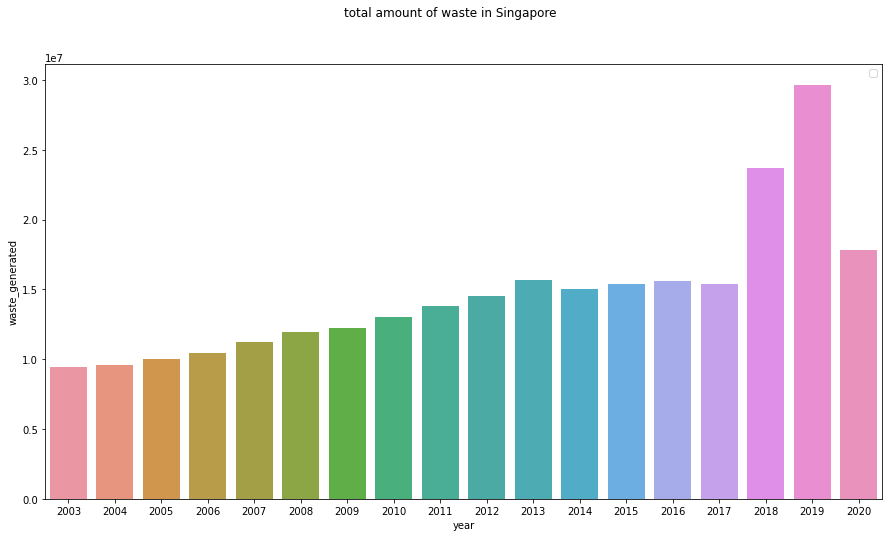

In [250]:
fig, axes = plt.subplots(figsize = (15,8))
fig.suptitle('total amount of waste in Singapore')
sns.barplot(data=waste, x=waste['year'], y=waste['waste_generated'])
plt.legend()
plt.show()

In the year of 2018 and 2019 have a largest waste prouction. As per graph, 2020 looks less waste. 

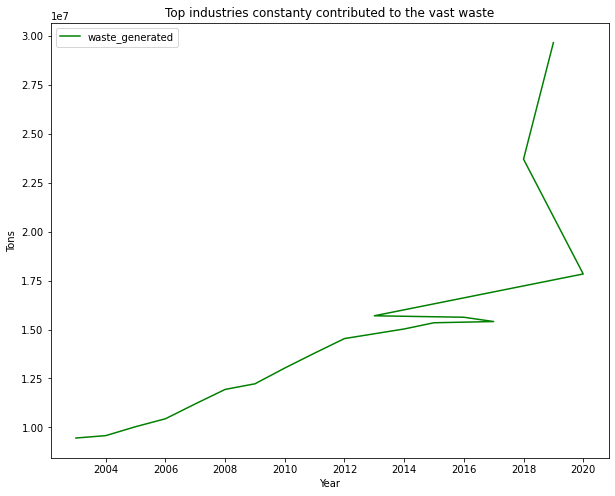

In [251]:
from matplotlib.ticker import MaxNLocator
ax = plt.figure(figsize=(10,8)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.plot('year', 'waste_generated', data=waste, color='green')
plt.title("Top industries constanty contributed to the vast waste")
plt.xlabel("Year")
plt.ylabel("Tons")
plt.legend()
plt.show()

In [252]:
top_waste = df.groupby(['waste_type'])[['waste_generated','waste_recycled']].sum().sort_values(by='waste_generated',ascending=False).reset_index()
top_waste=top_waste[top_waste['waste_type'] != "Total"].iloc[:10]
top_waste
#waste types from the data 1 from 2003 to 2017 and the large contributer for waste in top 15. 

,waste_type,waste_generated,waste_recycled
1,Paper/Cardboard,18120800,9205200
2,Plastics,10252500,999100
3,Construction Debris,10032100,9817800
4,Ferrous Metal,7629100,7208700
5,Food waste,6701500,698300
6,Ferrous metal,5530700,5444700
7,Used Slag,4342100,4130700
8,C&D,4276900,4248600
9,"Others (stones, ceramics & rubber etc)",3433200,76100
10,Food,3174900,449600


In [253]:
top_waste_2= df1.groupby(['waste_type'])[['waste_generated','waste_recycled']].sum().sort_values(by='waste_generated',ascending=False).reset_index()
top_waste_2=top_waste_2[top_waste_2['waste_type'] != "Overall"]
top_waste_2.iloc[:10]
#waste types from the data 2 from 2018 to 2020 and the large contributer for waste in top 15.

,waste_type,waste_generated,waste_recycled
1,Food,9256000,388000
2,Construction& Demolition,6116000,3052000
3,Paper/Cardboard,4676000,1467000
4,Ferrous Metal,3943000,1396000
5,Plastics,2861000,114000
6,Wood,2175000,912000
7,Ferrous metal,1864000,930000
8,Horticultural,1802000,769000
9,Construction & Demolition,1647000,822000
10,Used Slag,616000,306000


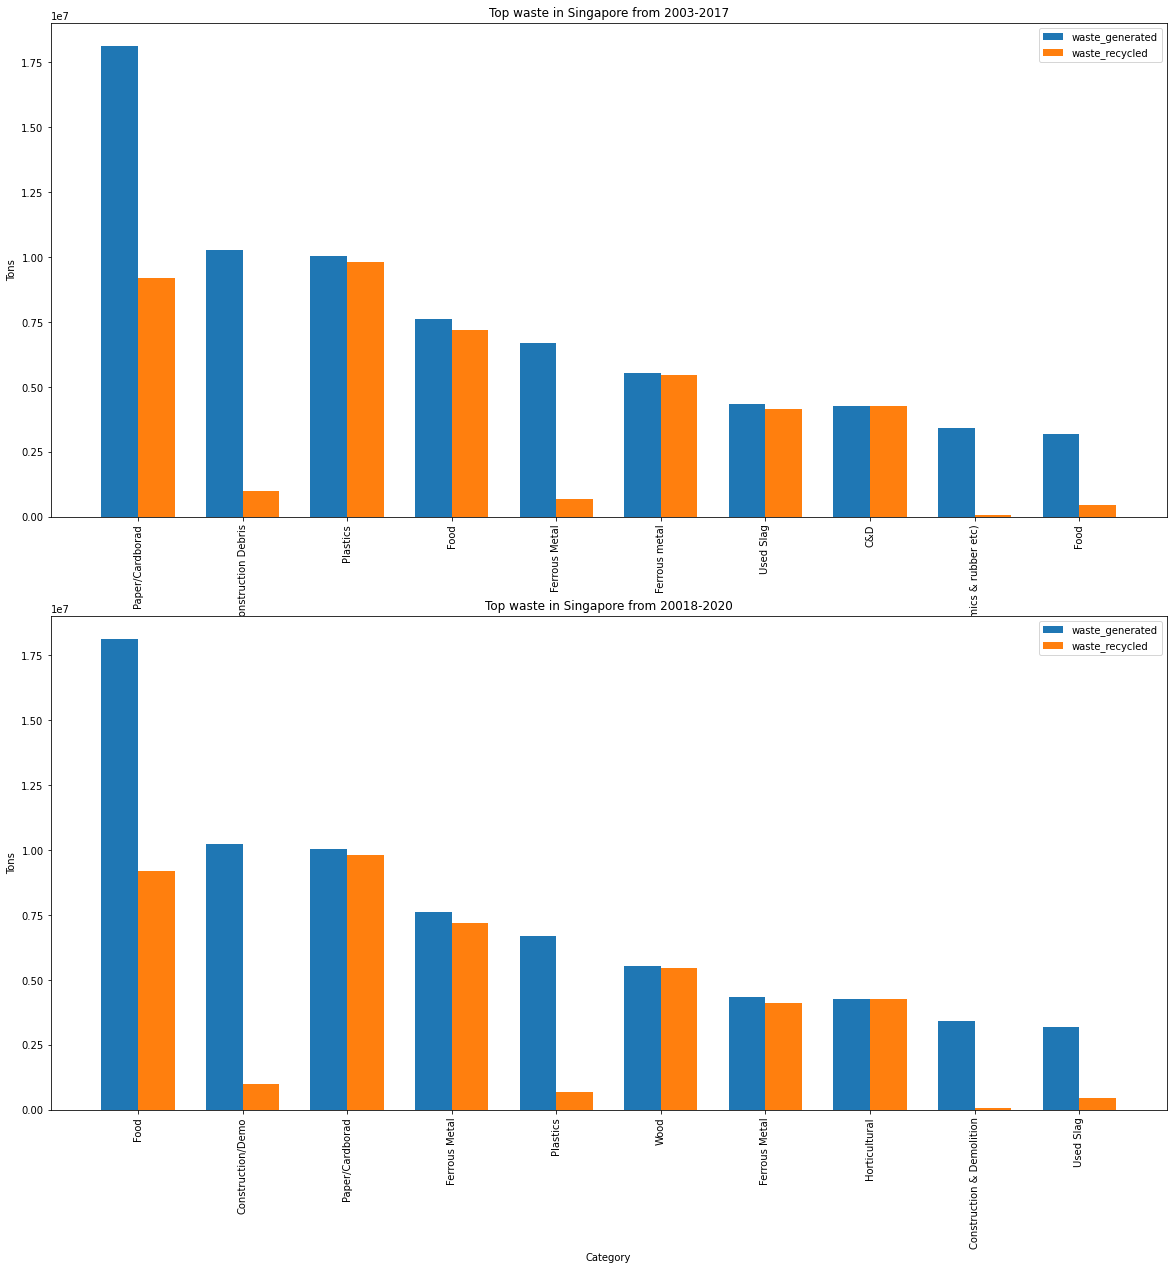

In [254]:
index = np.arange(10)
bar_width = 0.35
fig, ax = plt.subplots(2,figsize = (20,20))
summer = ax[0].bar(index, top_waste['waste_generated'], bar_width,
                label="waste_generated")

winter = ax[0].bar(index+bar_width, top_waste['waste_recycled'],
                 bar_width, label="waste_recycled")

ax[0].set_xlabel('')
ax[0].set_ylabel('Tons')
ax[0].set_title('Top waste in Singapore from 2003-2017')
ax[0].set_xticks(index + bar_width / 2)
ax[0].set_xticklabels(["Paper/Cardborad","Construction Debris", "Plastics", "Food", "Ferrous Metal", "Ferrous metal","Used Slag", "C&D","Others (stones, ceramics & rubber etc)","Food"],rotation = 90)
ax[0].legend()
summ = ax[1].bar(index, top_waste['waste_generated'], bar_width, label="waste_generated")

win = ax[1].bar(index+bar_width, top_waste['waste_recycled'], bar_width, label="waste_recycled")

ax[1].set_xlabel('Category')
ax[1].set_ylabel('Tons')
ax[1].set_title('Top waste in Singapore from 20018-2020')
ax[1].set_xticks(index + bar_width / 2)
ax[1].set_xticklabels([ "Food", "Construction/Demo","Paper/Cardborad","Ferrous Metal", "Plastics", "Wood", "Ferrous Metal", "Horticultural","Construction & Demolition","Used Slag"], rotation = 90)
ax[1].legend()

plt.show()

In current years, waste is changing from cardboards/papers towards foods. 

---



In [256]:
#The greatest recycling Waste
recycle = data[data['recycling_rate']==0.99]['waste_type'].value_counts()
fig=go.Figure(data=[go.Pie(values = recycle.values, labels = recycle.index, hole=.6)])
fig.show()

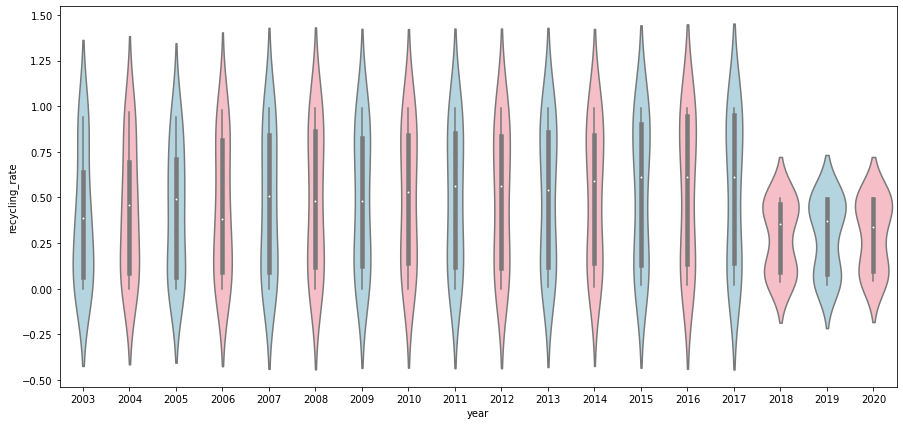

In [260]:
# Compare the recycling_rate between years
plt.figure(figsize=(15, 7))
sns.violinplot("year", "recycling_rate", data=df3,
               palette=["lightblue", "lightpink"]);

##CONCLUSION

---



we checked how the waste management is working in Singapore. Waste where shifting every day. its looks like in recent years singapore is waisting more food products than before 2018. Even Singapore is one the nation who have high recycle rate, still goverment needs to focus to create less waste and management. 